## Step1 : Load data and packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target

## Step 2: Simple EDA

Get a sense of the data's structure with these commands

Check missing values

Univariate Analysis by creating histogram for each variable to understand its distribution

In [4]:
data.head()
data.info()
data.describe()
# data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Check for Missing Values

Ensure that the dataset doesn't have missing values

In [5]:
data.isnull().sum(axis=0)

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Univariate analysis by histogram

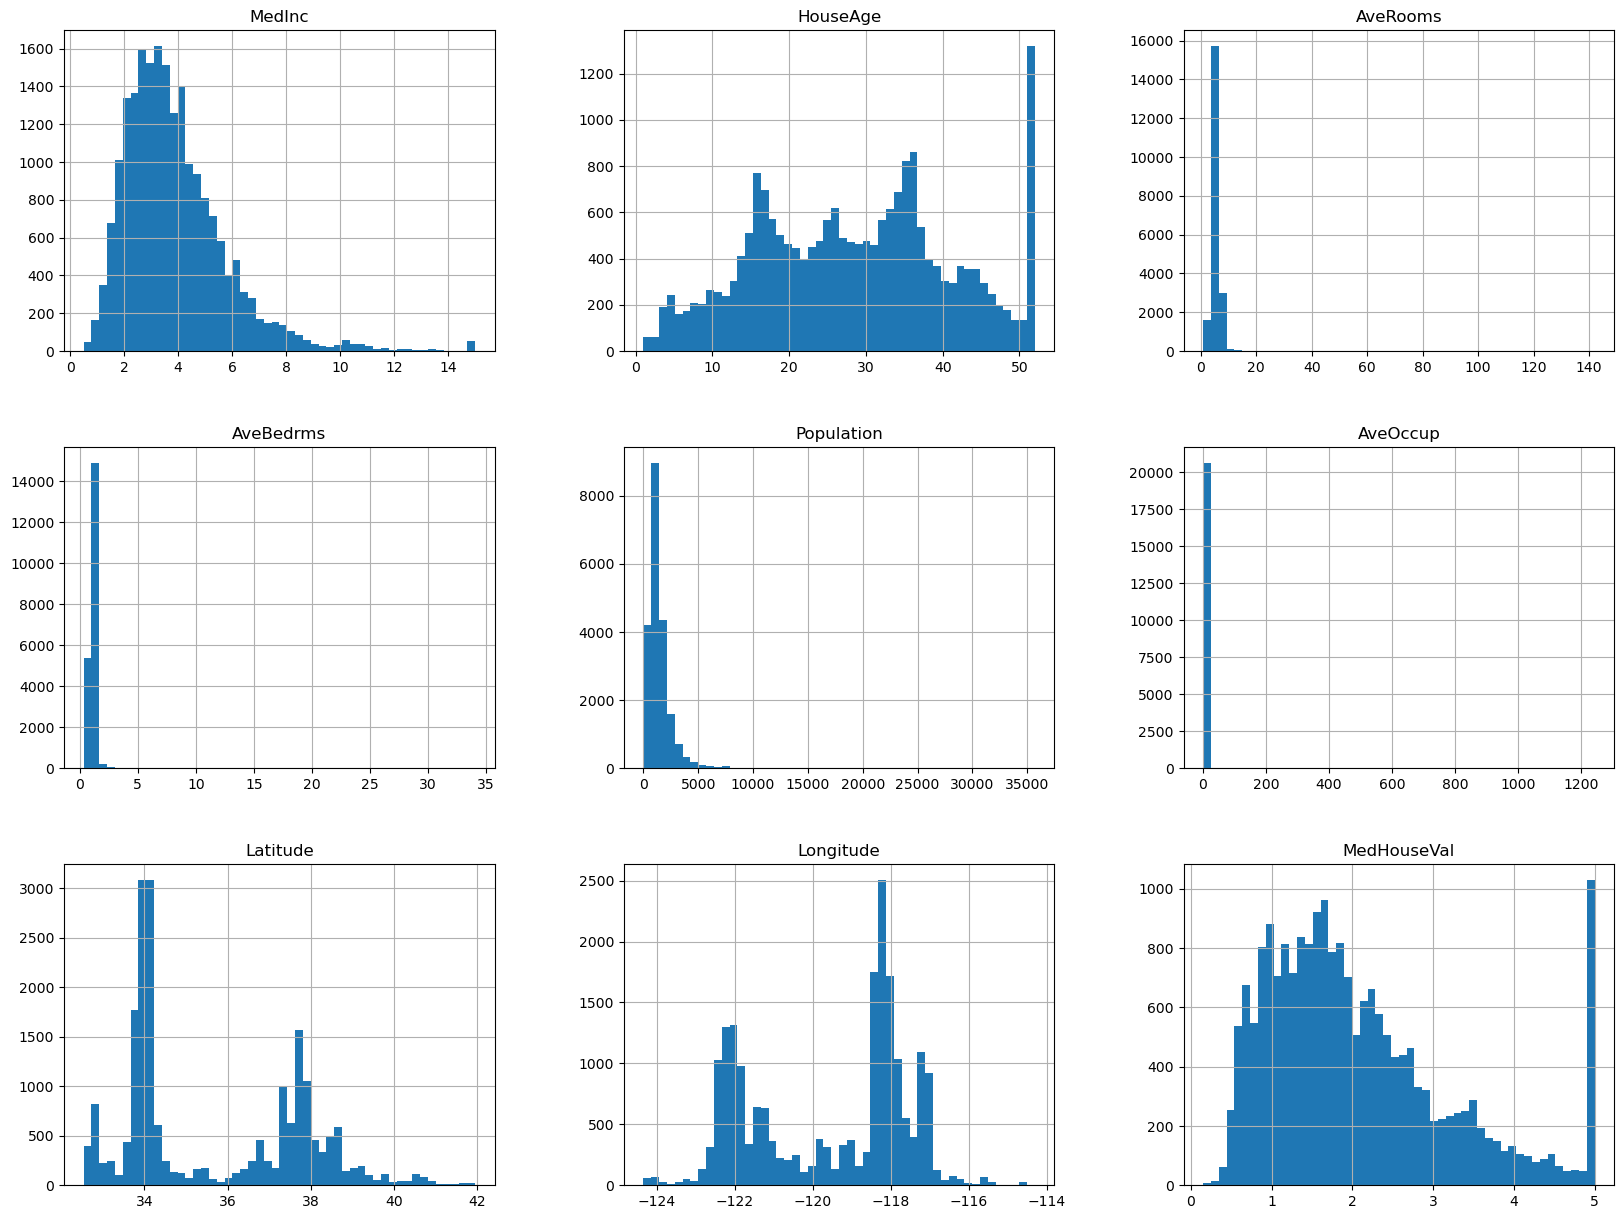

In [6]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Correlation Analysis

Examine the correlations between different features and the target variable ("medHOuse val")

<Axes: >

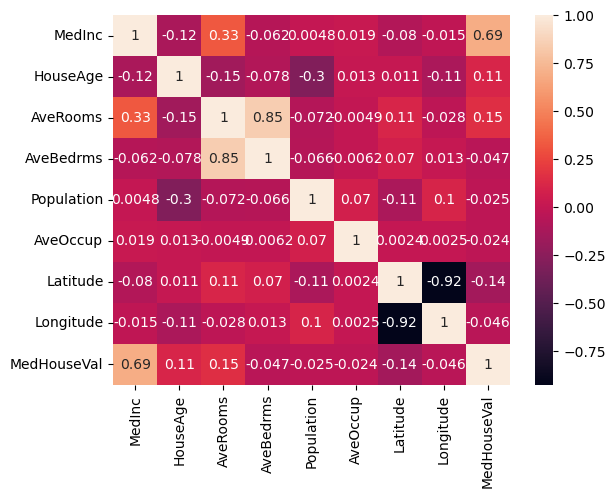

In [7]:
correlation_matrix = data.corr()
sns.heatmap(data = correlation_matrix, annot = True)

Bivariate Analysis

plot scatter plots for features against the target variable to see how they are related

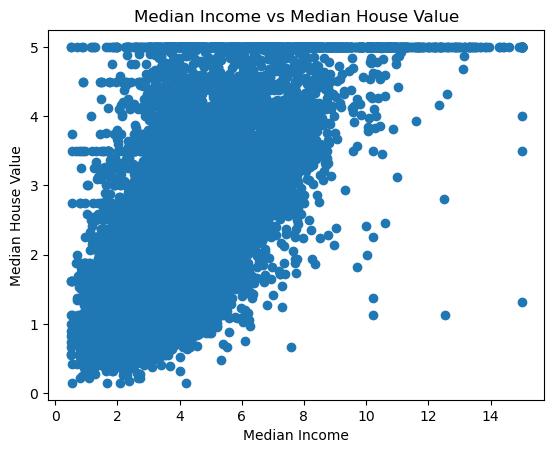

In [8]:
plt.scatter(data['MedInc'], data['MedHouseVal'])
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs Median House Value')
plt.show()


Identify Outliers and Anomalies

Look for any odd or extreme values that could influence the model's peformace


## Summary

The dataset has 20640 rows and 10 columns

There are no missing values in the dataset

The dataset has 8 numerical features and 2 categorical features

The target variable is "medHouseVal"

The histogram shows that the features are not normally distributed and have a long tail

This can be fixed by applying a log transformation to the features to make them more normally distributed

The features are highly correlated with each other. Median income has the highest correlation with the target variable

Bivariate analysis shows that the features are not linearly related to the target variable. The scatter plot for median income shows that there are strong positive linear relationship between median income and median house value, comfirming that as the median income increases, the median house value also increases.

anomaliy detection shows that there are outliers in the dataset. The outliers can be removed to improve the model's performance


## Data Preprocessing

Feature scaling

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. Common methods include Min-Max scaling and Standardization.

I dropped "MedHouseVal" during standardization because it's the target variable, and we generally don't scale the target variable when preparing data for supervised learning tasks like regression. Feature scaling is mainly done for the predictor variables to ensure that they all have the same influence on the model, especially for algorithms that rely on distance metrics or gradient descent.

The target variable is what we're trying to predict, so its original scale is usually kept intact so that the model's predictions are directly interpretable in the same units as the target variable.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sclaed_data = scaler.fit_transform(data.drop('MedHouseVal', axis=1))

Splitting the dataset into training and test sets

1. test_size: This parameter determines the proportion of the dataset to include in the test split. If you set it to 0.2, as in the example, it means that 20% of the data will be used for testing, and the remaining 80% will be used for training. You can also specify it as an integer to indicate the absolute number of test samples.

2. random_state: This parameter is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices. Setting random_state to an integer (e.g., 42) ensures that the splits you generate are reproducible. If you don't set a random_state, the system will use a random number, and your train-test splits will be different each time you run the code, making it harder to reproduce your results.

By setting these parameters, you control both the randomness and the proportion of your data splitting, which is useful for model evaluation and comparison.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sclaed_data, data['MedHouseVal'], test_size=0.2, random_state=42)

In [44]:
# Linear Regression Model from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [45]:
# Build from pytorch
import torch
import torch.nn as nn
import torch.optim as optim

In [46]:
y_train.shape

(16512,)

In [37]:
X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
X_test_tensor = torch.tensor(X_test, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype = torch.float32).view(-1,1)

## y_train.values because y_train is a pandas series and we need to convert it to a numpy array

# The -1 is used as a placeholder for an unknown dimension that should be inferred from the size of the original tensor.
# Essentially, it means "any size that will maintain the number of elements in the tensor."
# The 1 indicates that we want each element to be contained within its own inner array,
#  essentially converting the tensor to a 2D tensor where each row has one element.
# For example, let's say y_train.values has a shape of (100,). After executing view(-1, 1), the shape will be (100, 1).

In [40]:
class LinearRegression(nn.Module):
	def __init__(self, input_dim):
		super().__init__()
		self.linear = nn.Linear(input_dim, 1)
	def forward(self,x):
		return self.linear(x)

model = LinearRegression(X_train_tensor.shape[1])
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

#Training loop
for epoch in range(100):
	model.train()
	optimizer.zero_grad()
	y_pred = model(X_train_tensor)
	loss = criterion(y_pred, y_train_tensor)
	loss.backward()
	optimizer.step()

# Make prediction
model.eval()
with torch.no_grad():
	y_pred_tensor = model(X_test_tensor)
	y_pred = y_pred_tensor.numpy()
	y_pred = y_pred.reshape(-1,1)
	rmse = np.sqrt(mean_squared_error(y_test, y_pred))




## Evaluation Metrics
1. Scikit-learn's mean_squared_error function, r2_score
2. torch.nn.MSELoss

In [47]:
from sklearn.metrics import r2_score
re_sklearn = r2_score(y_test, y_pred_sklearn)

y_test_tensor = torch.tensor(y_test.values, dtype = torch.float32).view(-1,1)
ss_t = torch.sum((y_test_tensor - torch.mean(y_test_tensor))**2)
ss_r = torch.sum((y_test_tensor - y_pred_tensor)**2)
r2_torch = 1 - ss_r/ss_t

Comparing the Models
Now you have both the RMSE and R-squared values for both models. You can compare these metrics to see which model performs better on your dataset. Remember:

Lower RMSE values indicate a better fit to the data.
Higher R-squared values indicate a better fit to the data.
Summary and Documentation
Finally, it's good practice to summarize your findings:

Discuss the performance of each model.
Note any challenges you faced and how you addressed them.
Consider any improvements that could be made.
